# 案例2：时间与电压的关系

## 导入相关的包

In [43]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import time

## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

## 读取数据,异常值处理

In [12]:
## 读取数据
path='datas/household_power_consumption_1000.txt'
df=pd.read_csv(path,sep=';',low_memory=False)

# 异常数据处理
new_df=df.replace('?',np.nan)
datas=new_df.dropna(axis=0,how='any')
datas.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [44]:
## 创建一个时间字符串格式化字符串
def date_format(dt):
    import time
    t = time.strptime(' '.join(dt), '%d/%m/%Y %H:%M:%S')
    return (t.tm_year, t.tm_mon, t.tm_mday, t.tm_hour, t.tm_min, t.tm_sec)

## 获取自变量与因变量

In [45]:
# 时间与电压的关系
# 获取x和y，并将时间转换成数值型连续变量
X=datas[['Date','Time']]
X=X.apply(lambda x:pd.Series(date_format(x)),axis=1)
Y=datas['Voltage']

## 划分训练集测试集

In [46]:
# 对数据集进行划分
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
print(len(X_train))
print(len(X_test))

800
200


## 对数据进行标准化处理

In [47]:
# 数据标准化
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

## 进行模型训练

In [48]:
# 模型训练
linear=LinearRegression()
linear.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 对模型进行校验

In [31]:
# 模型校验
y_predict=linear.predict(X_test)

In [49]:
# 模型效果
print('准确率: ',linear.score(X_test,Y_test))

准确率:  0.4850657817514212


## 预测值与真实值画图比较

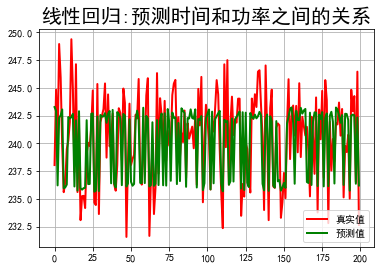

In [42]:
# 预测值和实际值画图比较
t=np.arange(len(X_test))
plt.figure(facecolor='w')
plt.plot(t,Y_test,'r-',linewidth=2,label=u'真实值')
plt.plot(t,y_predict,'g-',linewidth=2,label=u'预测值')
plt.legend(loc='lower right')
plt.title(u'线性回归:预测时间和电压之间的关系',fontsize=20)
plt.grid(b=True)
plt.show()